# Imbalanced Data
- A dataset is **imbalanced** when the number of observations in one class is much higher than in the other(s).
- Example: Fraud detection (99% transactions are normal, 1% fraud).

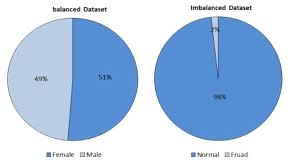

#  Example of Imbalanced Data

### Fraud Detection Dataset (Toy Example)

| Transaction ID | Amount (₹) | Fraud (Target) |
|----------------|------------|----------------|
| T001           | 1200       | 0 (Not Fraud)  |
| T002           | 500        | 0 (Not Fraud)  |
| T003           | 9000       | 0 (Not Fraud)  |
| T004           | 15000      | 1 (Fraud)      |
| T005           | 750        | 0 (Not Fraud)  |
| T006           | 300        | 0 (Not Fraud)  |
| T007           | 2000       | 0 (Not Fraud)  |
| T008           | 20000      | 1 (Fraud)      |
| T009           | 450        | 0 (Not Fraud)  |
| T010           | 5500       | 0 (Not Fraud)  |

### Class Distribution

| Class (Fraud) | Count | Percentage |
|---------------|-------|------------|
| 0 (Not Fraud) | 9     | 90%        |
| 1 (Fraud)     | 1     | 10%        |

This is **imbalanced** because one class (Not Fraud) dominates the dataset.

You don't want your model to learn only data pattern which is in majority.

- **When one class has very high % as compared to other class imbalance.**

Or
- **When the differnce between count or % of both class is very huge.**


# How to Handle Imbalanced Data

Imbalanced data = one class has way more samples than the other.  
If not handled, models become biased toward the majority class.  

---

## 🔹 Techniques to Handle Imbalance

### 1. Resampling Methods
- **Oversampling (Minority ↑)**  
  Duplicate or create synthetic samples of minority class.  
  Example: **SMOTE (Synthetic Minority Oversampling Technique)**  
- **Undersampling (Majority ↓)**  
  Randomly remove samples from majority class.  
- **Hybrid** = Combine oversampling + undersampling.  

---

### 2. Class Weight Adjustment
- Assign **higher weights** to minority class during training.  
- Many ML algorithms support `class_weight='balanced'`.  

---

### 3. Ensemble Methods
- Algorithms designed for imbalance:  
  - **Balanced Random Forest**  
  - **EasyEnsemble / AdaBoost**  

---

### 4. Use Better Metrics
- Don’t rely only on Accuracy.  
- Prefer: **Precision, Recall, F1-score, ROC-AUC**.  

---

### 5. Alternative Approaches
- **Anomaly detection** if minority class is extremely rare.  
- **Collect more data** (if possible).  

---

## Key Idea
Balance the data or adjust the model so that the **minority class gets proper attention**.  


#  Handling Imbalanced Data – Summary Table

| Method                  | When to Use                           | Pros                                | Cons                               |
|--------------------------|---------------------------------------|-------------------------------------|------------------------------------|
| **Oversampling**         | Minority class very small             | Balances dataset, keeps info        | Risk of overfitting (duplicates)   |
| **Undersampling**        | Majority class very large             | Simple, fast                        | Can lose useful data               |
| **SMOTE** (Synthetic)    | Need more minority samples            | Creates new, realistic samples      | May create noisy data              |
| **Class Weights**        | Algorithms that support weights       | No data loss, easy to apply         | May not always improve results     |
| **Ensemble Methods**     | Complex tasks, highly imbalanced data | More robust, handles imbalance well | Computationally expensive          |
| **Anomaly Detection**    | Minority class extremely rare (<1%)   | Good for rare-event detection       | Not always accurate for all cases  |

---

 **Rule of Thumb**:  
- Try **class weights** first (quick fix).  
- Use **SMOTE / resampling** for small datasets.  
- Go for **ensemble methods** in tougher, real-world problems.  


# Undersampling

###  What is Undersampling?
- Reduce the size of the **majority class** to balance with the minority class.  
- Example: If data = 900 Not Fraud vs 100 Fraud → randomly drop 800 Not Fraud samples → balanced 100 vs 100.

---

###  Advantages
- Simple and fast  
- Works well when dataset is very large  
- Reduces training time  

---

### Disadvantages
- Risk of losing important information  
- Can reduce model performance if too much data is removed  

---

### When to Use?
- When majority class is **huge** compared to minority  
- When you can afford to lose some majority samples without harming model accuracy  


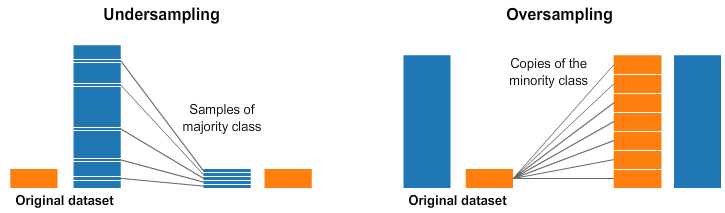

# Oversampling

### What is Oversampling?
- Increase the number of **minority class samples** to balance the dataset.  
- Example: If data = 900 Not Fraud vs 100 Fraud → duplicate or generate extra Fraud samples until both classes are balanced (900 vs 900).

---

### Advantages
- No information loss (all majority samples are kept)  
- Helps models learn patterns from the minority class  
- Works well for small datasets  

---

### Disadvantages
- Risk of **overfitting** (if just duplicating minority samples)  
- Increases training time  
- Synthetic data (like SMOTE) can sometimes add noise  

---

### When to Use?
- When dataset is **small**  
- When minority class is too underrepresented  
- Works best with advanced methods like **SMOTE** (Synthetic Minority Oversampling Technique)  


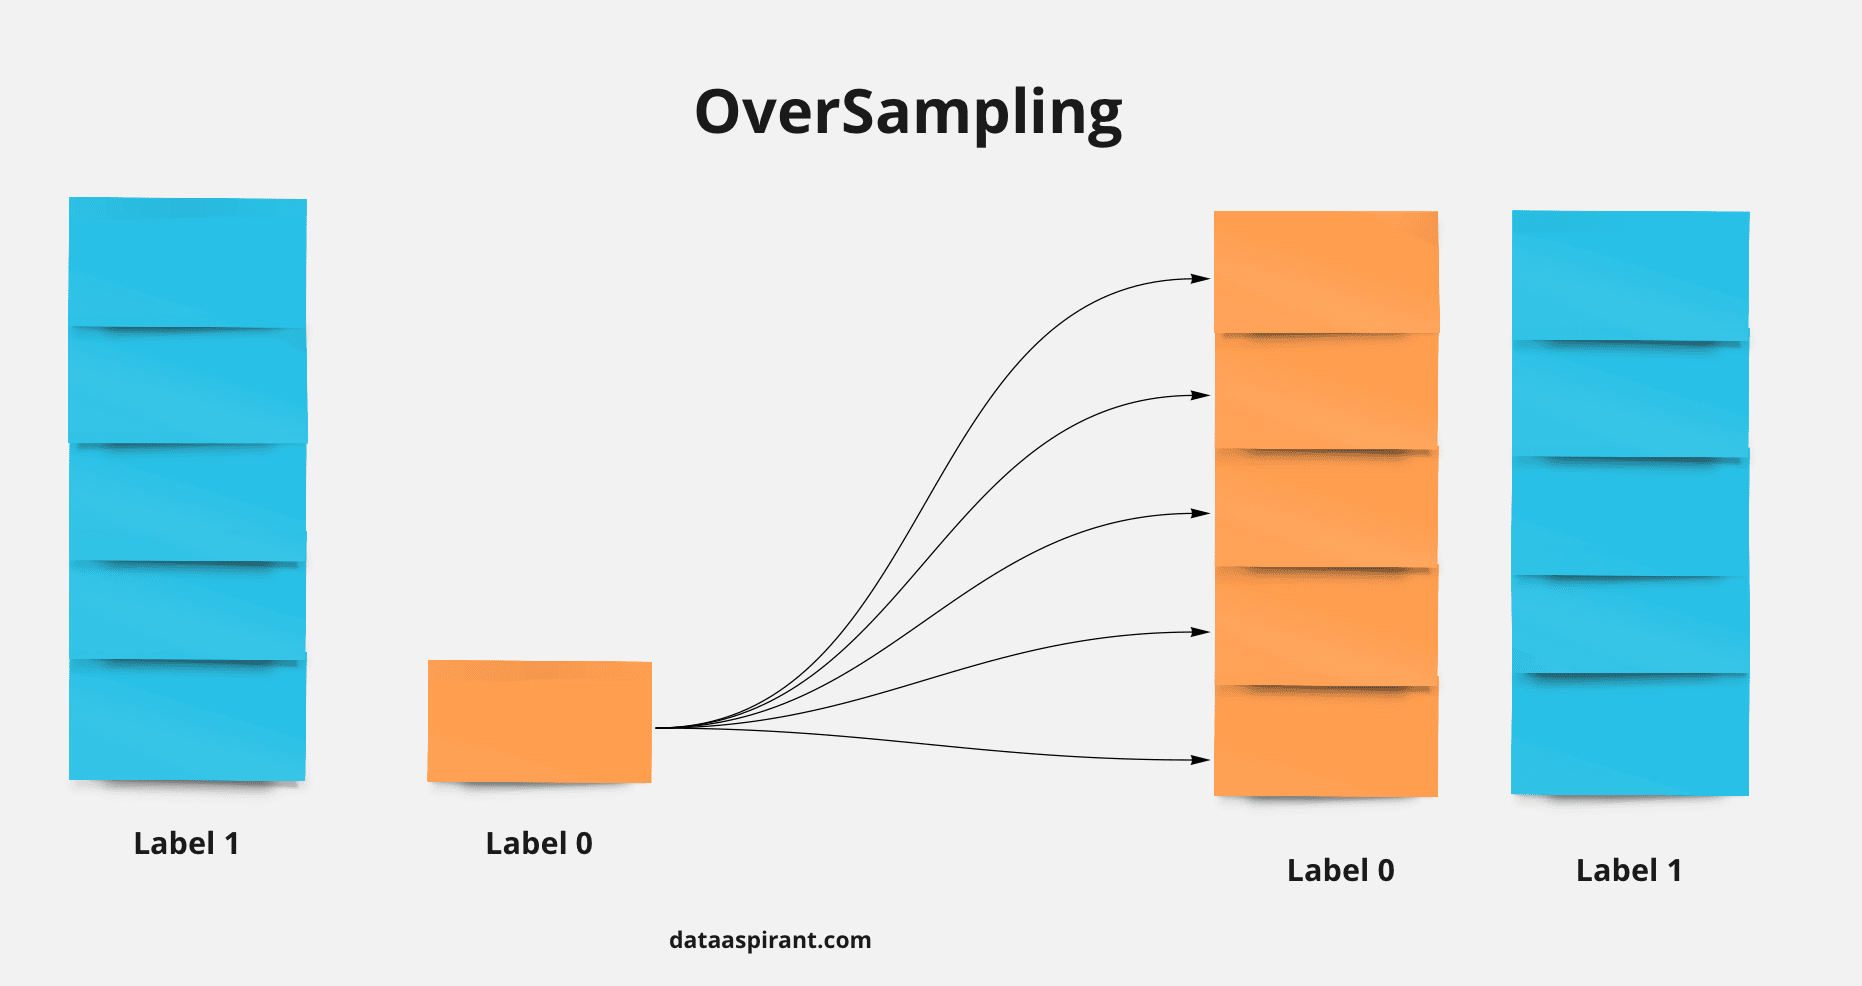

# SMOTE (Synthetic Minority Oversampling Technique)

### What is SMOTE?
- Instead of just duplicating minority samples, SMOTE **creates synthetic (new) samples**.  
- Works by:
  1. Picking a minority sample
  2. Finding its nearest neighbors
  3. Creating a new synthetic point **between** them  

Example: If Fraud = 100, Not Fraud = 900 → SMOTE generates new Fraud-like data until balance is achieved.  

---

### Advantages
- Reduces risk of overfitting compared to simple oversampling  
- Creates more realistic & diverse samples  
- Keeps all majority class data  

---

### Disadvantages
- Can create **noisy or overlapping samples**  
- Not always good for **highly imbalanced & small datasets**  
- Increases computation  

---

### When to Use?
- When dataset is **small** and minority class is very underrepresented  
- When you want more diversity than simple duplication can provide  

---

### Example (Before vs After SMOTE)

| Class        | Count (Before) | Count (After SMOTE) |
|--------------|----------------|----------------------|
| Not Fraud (0)| 900            | 900                  |
| Fraud (1)    | 100            | 900                  |


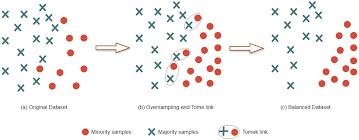

# Practical Implementation

In [3]:
import pandas as pd
import numpy as np

np.random.seed(1) # for reproducibility of result

num_sample = 1000
class_0_ratio = 0.9
num_class_0 = int(num_sample*class_0_ratio)
num_class_1 = 100

In [4]:
num_class_0, num_class_1

(900, 100)

In [8]:
class_0 = {'feature1': np.random.normal(0, 1, num_class_0),
           'feature2': np.random.normal(0, 1, num_class_0),
           'target': [0]*num_class_0}

In [10]:
class_0 = pd.DataFrame(class_0)
class_0

,feature1,feature2,target
0,-0.153236,0.933630,0
1,-2.432509,-1.763775,0
2,0.507984,-0.410217,0
3,-0.324032,-0.453667,0
4,-1.511077,-0.589430,0
...,...,...,...
895,0.213026,-1.597214,0
896,-0.804542,0.461016,0
897,-0.646582,1.316506,0
898,1.138173,0.296370,0


In [18]:
class_1 = {'feature1': np.random.normal(3, 1, num_class_1),
           'feature2': np.random.normal(3, 1, num_class_1),
           'target': [1]*num_class_1}

In [19]:
class_1 = pd.DataFrame(class_1)
class_1

,feature1,feature2,target
0,2.922893,1.678487,1
1,3.207825,3.599902,1
2,3.986196,2.321652,1
3,4.432756,3.508945,1
4,3.528258,3.538265,1
...,...,...,...
95,4.610881,2.519965,1
96,4.055869,3.535710,1
97,1.881680,2.751148,1
98,2.222825,3.357532,1


In [20]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)
df

,feature1,feature2,target
0,-0.153236,0.933630,0
1,-2.432509,-1.763775,0
2,0.507984,-0.410217,0
3,-0.324032,-0.453667,0
4,-1.511077,-0.589430,0
...,...,...,...
995,4.610881,2.519965,1
996,4.055869,3.535710,1
997,1.881680,2.751148,1
998,2.222825,3.357532,1


In [21]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

## Upsampling

In [22]:
df_minority = df[df.target == 1]
df_majority = df[df.target == 0]

In [23]:
df_majority

,feature1,feature2,target
0,-0.153236,0.933630,0
1,-2.432509,-1.763775,0
2,0.507984,-0.410217,0
3,-0.324032,-0.453667,0
4,-1.511077,-0.589430,0
...,...,...,...
895,0.213026,-1.597214,0
896,-0.804542,0.461016,0
897,-0.646582,1.316506,0
898,1.138173,0.296370,0


In [24]:
df_minority

,feature1,feature2,target
900,2.922893,1.678487,1
901,3.207825,3.599902,1
902,3.986196,2.321652,1
903,4.432756,3.508945,1
904,3.528258,3.538265,1
...,...,...,...
995,4.610881,2.519965,1
996,4.055869,3.535710,1
997,1.881680,2.751148,1
998,2.222825,3.357532,1


In [32]:
# Replace >> if replace is true >> data point can be repeated

from sklearn.utils import resample

df_minority_upsamples = resample(df_minority, replace= True, n_samples= len(df_majority), random_state=1)

In [33]:
df_minority_upsamples

,feature1,feature2,target
937,1.682418,3.465758,1
912,3.970364,4.909529,1
972,3.055297,2.724398,1
909,4.789976,2.815400,1
975,2.872518,3.308397,1
...,...,...,...
936,2.590569,2.693964,1
998,2.222825,3.357532,1
901,3.207825,3.599902,1
932,4.487621,0.260858,1


In [39]:
df_upsampled = pd.concat([df_majority, df_minority_upsamples])
df_upsampled

,feature1,feature2,target
0,-0.153236,0.933630,0
1,-2.432509,-1.763775,0
2,0.507984,-0.410217,0
3,-0.324032,-0.453667,0
4,-1.511077,-0.589430,0
...,...,...,...
936,2.590569,2.693964,1
998,2.222825,3.357532,1
901,3.207825,3.599902,1
932,4.487621,0.260858,1


In [40]:
df_upsampled.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

## Downsampling

In [30]:
df_majority_downsample = resample(df_majority, replace= False, n_samples= len(df_minority), random_state= 1)

In [31]:
df_majority_downsample

,feature1,feature2,target
860,1.156962,0.832819,0
880,0.750375,-0.732807,0
874,-0.341643,-1.215225,0
780,1.835870,-0.838450,0
525,-0.361404,1.286126,0
...,...,...,...
494,1.165335,-0.484278,0
255,-1.139700,0.477895,0
672,-0.572602,-0.132966,0
481,-0.429596,-0.418124,0


In [36]:
df_downsample = pd.concat([df_minority, df_majority_downsample])
df_downsample

,feature1,feature2,target
900,2.922893,1.678487,1
901,3.207825,3.599902,1
902,3.986196,2.321652,1
903,4.432756,3.508945,1
904,3.528258,3.538265,1
...,...,...,...
494,1.165335,-0.484278,0
255,-1.139700,0.477895,0
672,-0.572602,-0.132966,0
481,-0.429596,-0.418124,0


In [38]:
df_downsample.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

## SMOTE

In [68]:
from sklearn.datasets import make_classification

In [69]:
x, y = make_classification(n_samples=1000, n_redundant=0, n_features= 2, n_clusters_per_class=1, weights=[0.90])

In [70]:
x

array([[ 1.94678914, -0.98772171],
       [ 0.5753635 , -1.29347343],
       [ 0.97246393, -2.31441268],
       ...,
       [-0.06222404, -0.53103033],
       [ 2.92833117, -0.50920699],
       [ 1.66591114, -2.03688033]], shape=(1000, 2))

In [71]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [72]:
df1 = pd.DataFrame(x, columns= ['f1', 'f2'])
df1

,f1,f2
0,1.946789,-0.987722
1,0.575364,-1.293473
2,0.972464,-2.314413
3,0.815727,-1.105431
4,1.453801,0.011125
...,...,...
995,0.844174,-1.602763
996,2.109322,-0.785920
997,-0.062224,-0.531030
998,2.928331,-0.509207


In [73]:
df1.target = y

C:\Users\DAV BABA\AppData\Local\Temp\ipykernel_19152\1733984369.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1.target = y


In [74]:

df2 = pd.DataFrame(y, columns= ['target'])
df2

,target
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [75]:
final_df = pd.concat([df1, df2], axis= 1)
final_df

,f1,f2,target
0,1.946789,-0.987722,0
1,0.575364,-1.293473,0
2,0.972464,-2.314413,0
3,0.815727,-1.105431,0
4,1.453801,0.011125,0
...,...,...,...
995,0.844174,-1.602763,0
996,2.109322,-0.785920,0
997,-0.062224,-0.531030,0
998,2.928331,-0.509207,0


In [76]:
import matplotlib.pyplot as plt

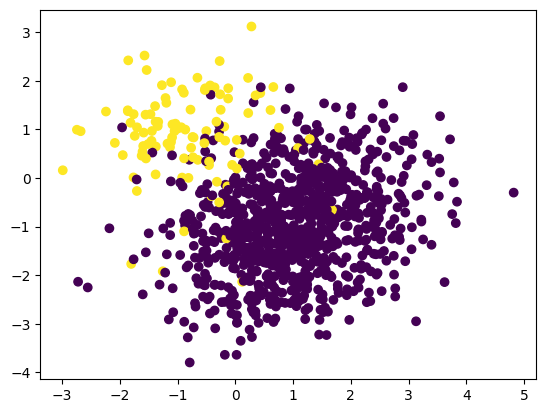

In [77]:
plt.scatter(final_df['f1'], final_df['f2'], c= final_df['target'])

In [ ]:
%pip install imblearn

In [79]:
from imblearn.over_sampling import SMOTE

In [80]:
over_sample  = SMOTE()

In [82]:
x, y = over_sample.fit_resample(final_df[['f1', 'f2']], final_df['target'])

In [83]:
x.shape

(1794, 2)

In [85]:
df1 = pd.DataFrame(x, columns= ['f1', 'f2'])
df2 = pd.DataFrame(y, columns= ['target'])
smote_df = pd.concat([df1, df2], axis= 1)

In [86]:
smote_df

,f1,f2,target
0,1.946789,-0.987722,0
1,0.575364,-1.293473,0
2,0.972464,-2.314413,0
3,0.815727,-1.105431,0
4,1.453801,0.011125,0
...,...,...,...
1789,-0.299814,1.762301,1
1790,-1.339877,1.096145,1
1791,-0.162342,-0.157875,1
1792,-0.227355,-0.123791,1


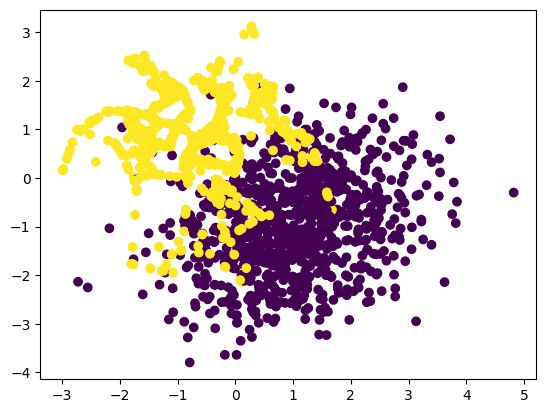

In [87]:
plt.scatter(smote_df['f1'], smote_df['f2'], c = smote_df['target'])